## Data Vectorization

In [2]:
import numpy as np

def unvectorized(n, theta, x):
    prediction = 0.0
    for j in range(n):
        prediction = prediction + theta[j] * x[j]
    return prediction

def vectorized(theta, x):
    prediction = 0.0
    prediction = np.dot(theta.transpose(), x)
    return prediction

n = 100
theta = np.random.rand(n)
x = np.random.randint(0, 100, n)

print(unvectorized(n, theta, x))
print(vectorized(theta, x))

2321.3119365057873
2321.311936505787


## simple network example

In [10]:
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

seed(1)
network = initialize_network(3, 1, 3)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217]}]
[{'weights': [0.49543508709194095, 0.4494910647887381]}, {'weights': [0.651592972722763, 0.7887233511355132]}, {'weights': [0.0938595867742349, 0.02834747652200631]}]


### what does it mean

Neural networks are made up of nodes or units , connected by links

Each link has an associated weight and activation level

Each node has an input function (typically summing over weighted inputs), an activation function , and an output

Input_Layer to hidden layer : [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]

Hidden_layer to output layer : [{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]

## Forward Propagation

In [24]:
from math import exp

def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            print('neuron is ', neuron, ' activation is', activation, ' transfer activation is ', transfer(activation))
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217]}],
[{'weights': [0.49543508709194095, 0.4494910647887381]}, {'weights': [0.651592972722763, 0.7887233511355132]}, {'weights': [0.0938595867742349, 0.02834747652200631]}]]
#network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
#		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [-50, 1000, 1000, None]
output = forward_propagate(network, row)
print(output)

neuron is  {'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217], 'output': 1.0}  activation is 1604.7452127339661  transfer activation is  1.0
neuron is  {'weights': [0.49543508709194095, 0.4494910647887381], 'output': 0.7200936423049513}  activation is 0.9449261518806791  transfer activation is  0.7200936423049513
neuron is  {'weights': [0.651592972722763, 0.7887233511355132], 'output': 0.8085036312204491}  activation is 1.4403163238582761  transfer activation is  0.8085036312204491
neuron is  {'weights': [0.0938595867742349, 0.02834747652200631], 'output': 0.530513799409839}  activation is 0.1222070632962412  transfer activation is  0.530513799409839
[0.7200936423049513, 0.8085036312204491, 0.530513799409839]


## Back propogation

In [25]:
def transfer_derivative(output):
    return output * (1 - output)

def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    # print(neuron['weights'][j] * neuron['delta'])
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
            # print(errors[j] * transfer_derivative(neuron['output']))

network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
    print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


### Stacostic Gradient descent

[-0.97610055]
>0 f([-0.97608103]) = 0.95273
>1 f([-0.97606151]) = 0.95270
>2 f([-0.97604199]) = 0.95266
>3 f([-0.97602246]) = 0.95262
>4 f([-0.97600294]) = 0.95258
>5 f([-0.97598342]) = 0.95254
>6 f([-0.9759639]) = 0.95251
>7 f([-0.97594438]) = 0.95247
>8 f([-0.97592487]) = 0.95243
>9 f([-0.97590535]) = 0.95239
>10 f([-0.97588583]) = 0.95235
>11 f([-0.97586631]) = 0.95232
>12 f([-0.97584679]) = 0.95228
>13 f([-0.97582728]) = 0.95224
>14 f([-0.97580776]) = 0.95220
>15 f([-0.97578824]) = 0.95216
>16 f([-0.97576873]) = 0.95212
>17 f([-0.97574921]) = 0.95209
>18 f([-0.9757297]) = 0.95205
>19 f([-0.97571018]) = 0.95201
>20 f([-0.97569067]) = 0.95197
>21 f([-0.97567116]) = 0.95193
>22 f([-0.97565164]) = 0.95190
>23 f([-0.97563213]) = 0.95186
>24 f([-0.97561262]) = 0.95182
>25 f([-0.9755931]) = 0.95178
>26 f([-0.97557359]) = 0.95174
>27 f([-0.97555408]) = 0.95171
>28 f([-0.97553457]) = 0.95167
>29 f([-0.97551506]) = 0.95163


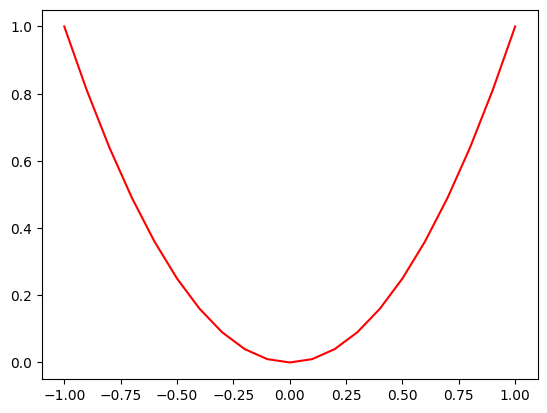

In [49]:

from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

def objective(x):
	return x**2.0

def derivative(x):
	return x * 2.0

def gradient_descent(objective, derivative, bounds, n_iter, learningRate):
    solutions, scores = list(), list()
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    print(solution)
    for i in range(n_iter):
        gradient = derivative(solution)
        solution = solution - learningRate * gradient
        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

bounds = asarray([[-1.0, 1.0]])
n_iter = 30
learningRate = 0.00001
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, learningRate)
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
results = objective(inputs)
#pyplot.plot(solutions, scores)
pyplot.plot(inputs, results, color='red')
#pyplot.plot(results, color='green')

## Combining it all to predict

In [111]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from pandas import read_csv
import tensorflow as tf
#from keras.utils import np_utils
#dataframe = read_csv("./data/sonar.csv", header=None)
dataset = loadtxt('./data/sonar.csv', delimiter=',')
# X = dataframe.loc[:,:61].values
X = dataset[:,0:60]
# print(X_train)
# print("type: ", type(X_train))
# Y_train = dataset[:500,8]
# X_test = dataset[500:,:8]
# Y_test = dataset[500:,8]
y = dataset[:, 60]
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# print("encoded y",encoded_Y, " type ",type(encoded_Y))
# dummy_y = np_utils.to_categorical(encoded_Y)

model = Sequential()
model.add(Dense(250, input_dim=60, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy', 'categorical_accuracy'])
# model.compile(loss='mean_squared_error',
#               optimizer='sgd',
#               #metrics=[metrics.mae, metrics.categorical_accuracy]) \\or like 
#               metrics=['mae', 'categorical_accuracy'])
model.fit(X, y , epochs=250, batch_size=10, verbose=2) #X_train,Y_train
predictions = model.predict(X)
# print("predictions:",predictions[:10])
# prediction_list =[]
# for ind,pred in enumerate(predictions):
#     if pred >0.5:
#         prediction_list.append((1,pred))
#     else:
#         prediction_list.append((0,pred))
# print("predictions2:",prediction_list)
for i in range(150):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Epoch 1/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 341ms/epoch - 16ms/step
Epoch 2/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 19ms/epoch - 921us/step
Epoch 3/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 16ms/epoch - 781us/step
Epoch 4/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 18ms/epoch - 839us/step
Epoch 5/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 33ms/epoch - 2ms/step
Epoch 6/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 24ms/epoch - 1ms/step
Epoch 7/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 9ms/epoch - 418us/step
Epoch 8/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 18ms/epoch - 865us/step
Epoch 9/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 17m

Epoch 73/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 18ms/epoch - 853us/step
Epoch 74/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 16ms/epoch - 759us/step
Epoch 75/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 19ms/epoch - 885us/step
Epoch 76/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 17ms/epoch - 801us/step
Epoch 77/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 34ms/epoch - 2ms/step
Epoch 78/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 14ms/epoch - 654us/step
Epoch 79/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 18ms/epoch - 878us/step
Epoch 80/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 33ms/epoch - 2ms/step
Epoch 81/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.

21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 16ms/epoch - 756us/step
Epoch 145/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 16ms/epoch - 754us/step
Epoch 146/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 19ms/epoch - 885us/step
Epoch 147/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 16ms/epoch - 778us/step
Epoch 148/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 32ms/epoch - 2ms/step
Epoch 149/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 16ms/epoch - 785us/step
Epoch 150/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 17ms/epoch - 821us/step
Epoch 151/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 17ms/epoch - 818us/step
Epoch 152/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.000

21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 17ms/epoch - 789us/step
Epoch 216/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 32ms/epoch - 2ms/step
Epoch 217/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 14ms/epoch - 687us/step
Epoch 218/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 19ms/epoch - 905us/step
Epoch 219/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 30ms/epoch - 1ms/step
Epoch 220/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 15ms/epoch - 729us/step
Epoch 221/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 17ms/epoch - 832us/step
Epoch 222/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 31ms/epoch - 1ms/step
Epoch 223/250
21/21 - 0s - loss: 0.5337 - accuracy: 0.4663 - categorical_accuracy: 1.0000 - 